In [1]:
import pandas as pd
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

In [2]:
train_data = pd.read_csv('train_modified.csv') # Important!!
print(train_data.shape)
train_data.head()

/home/tintash/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (3,50) have mixed types. Specify dtype option on import or set low_memory=False.



(903653, 56)


Unnamed: 0 channelGrouping      date        fullVisitorId  \
0           0  Organic Search  20160902  1131660440785968503   
1           1  Organic Search  20160902   377306020877927890   
2           2  Organic Search  20160902  3895546263509774583   
3           3  Organic Search  20160902  4763447161404445595   
4           4  Organic Search  20160902    27294437909732085   

                        sessionId  socialEngagementType     visitId  \
0  1131660440785968503_1472830385  Not Socially Engaged  1472830385   
1   377306020877927890_1472880147  Not Socially Engaged  1472880147   
2  3895546263509774583_1472865386  Not Socially Engaged  1472865386   
3  4763447161404445595_1472881213  Not Socially Engaged  1472881213   
4    27294437909732085_1472822600  Not Socially Engaged  1472822600   

   visitNumber  visitStartTime device.browser         ...           \
0            1      1472830385         Chrome         ...            
1            1      1472880147        Firefox         ...            
2            1      1472865386         Chrome         ...            
3            1      1472881213     UC Browser         ...            
4            2      1472822600         Chrome         ...            

  trafficSource.adwordsClickInfo.isVideoAd  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  trafficSource.adwordsClickInfo.page trafficSource.adwordsClickInfo.slot  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                 NaN                                 NaN   

  trafficSource.campaign  trafficSource.campaignCode  \
0              (not set)                         NaN   
1              (not set)                         NaN   
2              (not set)                         NaN   
3              (not set)                         NaN   
4              (not set)                         NaN   

  trafficSource.isTrueDirect trafficSource.keyword trafficSource.medium  \
0                        NaN        (not provided)              organic   
1                        NaN        (not provided)              organic   
2                        NaN        (not provided)              organic   
3                        NaN       google + online              organic   
4                       True        (not provided)              organic   

  trafficSource.referralPath trafficSource.source  
0                        NaN               google  
1                        NaN               google  
2                        NaN               google  
3                        NaN               google  
4                        NaN               google  

[5 rows x 56 columns]

In [3]:
#Verify that campaign code is useless
column = train_data['trafficSource.campaignCode']
new_col = column.dropna()
print(new_col)

61493    11251kjhkvahf
Name: trafficSource.campaignCode, dtype: object


In [4]:
#Print all the column names
print(train_data.columns.values)

['Unnamed: 0' 'channelGrouping' 'date' 'fullVisitorId' 'sessionId'
 'socialEngagementType' 'visitId' 'visitNumber' 'visitStartTime'
 'device.browser' 'device.browserSize' 'device.browserVersion'
 'device.deviceCategory' 'device.flashVersion' 'device.isMobile'
 'device.language' 'device.mobileDeviceBranding' 'device.mobileDeviceInfo'
 'device.mobileDeviceMarketingName' 'device.mobileDeviceModel'
 'device.mobileInputSelector' 'device.operatingSystem'
 'device.operatingSystemVersion' 'device.screenColors'
 'device.screenResolution' 'geoNetwork.city' 'geoNetwork.cityId'
 'geoNetwork.continent' 'geoNetwork.country' 'geoNetwork.latitude'
 'geoNetwork.longitude' 'geoNetwork.metro' 'geoNetwork.networkDomain'
 'geoNetwork.networkLocation' 'geoNetwork.region'
 'geoNetwork.subContinent' 'totals.bounces' 'totals.hits'
 'totals.newVisits' 'totals.pageviews' 'totals.transactionRevenue'
 'totals.visits' 'trafficSource.adContent'
 'trafficSource.adwordsClickInfo.adNetworkType'
 'trafficSource.adwordsC

In [4]:
#View some non-zero transactions
transactionCol = train_data['totals.transactionRevenue']
nonZeroTransactions = transactionCol.dropna()
print(nonZeroTransactions)

752        37860000.0
753       306670000.0
799        68030000.0
802        26250000.0
859       574150000.0
866         8380000.0
893       395730000.0
910        24080000.0
922        35480000.0
925        35080000.0
930        81500000.0
942       546320000.0
971        63840000.0
974       117340000.0
976        43710000.0
999        34480000.0
1000       35390000.0
1008      339030000.0
1020       33670000.0
1022      635500000.0
1026      103240000.0
1027      305470000.0
1037        5150000.0
1041       90850000.0
1054       10590000.0
1055       25680000.0
1056      338970000.0
2774      593910000.0
3161       44790000.0
3268       30390000.0
             ...     
899951     43430000.0
903089     44790000.0
903118    175800000.0
903122     87990000.0
903167     14370000.0
903168    155970000.0
903189     75180000.0
903194    350000000.0
903201    135920000.0
903211    159980000.0
903222     23180000.0
903228     22970000.0
903234    463600000.0
903235     79990000.0
903243    

In [5]:
#Print some basic transaction stats
print('No of non-zero transactions : ', nonZeroTransactions.size)

transactionsSum = nonZeroTransactions.sum()
print('Total revenue is : ', transactionsSum)

print('Max revenue is : ', nonZeroTransactions.max())
print('Min revenue is : ', nonZeroTransactions.min())
print('Average revenue per transaction is : ', nonZeroTransactions.mean())

No of non-zero transactions :  11515
Total revenue is :  1540071240000.0
Max revenue is :  23129500000.0
Min revenue is :  10000.0
Average revenue per transaction is :  133744788.53669128


In [6]:
#Print some basic stats about unique users
uniqueUsersCount = train_data['fullVisitorId'].unique().size
print('No of unique users : ', uniqueUsersCount)

usersTransactionsSum = train_data.groupby('fullVisitorId')['totals.transactionRevenue'].sum()
payingUsers = usersTransactionsSum[usersTransactionsSum!=0]
payingUsersCount = payingUsers.size

print('No of paying users : ', payingUsersCount)

aveRevenuePerpayingUser = usersTransactionsSum.sum() / payingUsersCount

print('Ave. revenue per paying user : ', aveRevenuePerpayingUser)

#Some other comparisons about paying users
print('Percentage of users that pay : ', payingUsersCount/uniqueUsersCount)

No of unique users :  723803
No of paying users :  10114
Ave. revenue per paying user :  152271231.95570496
Percentage of users that pay :  0.013973415418283704


In [7]:
#Total number of users visited the store
totalVisitedUsers = train_data.groupby("fullVisitorId")["totals.visits"].sum()
print("Total number of unique users visited the site : ",totalVisitedUsers.size)

totalContinentVisited = train_data.groupby("geoNetwork.continent")['totals.visits'].sum()
print("Total number of users visited the site by each continent : ",totalContinentVisited.size)

totalContinentPurchased = train_data.groupby("geoNetwork.continent")["totals.transactionRevenue"].sum()
print("Mean of users purchased through site by each continent : ",totalContinentPurchased.mean())


totalsubContinentVisited = train_data.groupby("geoNetwork.subContinent")["totals.visits"].sum()
print("Total number of users visited the site by each sub-continent : ",totalsubContinentVisited.size)

totalsubContinentPurchased = train_data.groupby("geoNetwork.subContinent")["totals.transactionRevenue"].sum()
print("Mean of users purchased through site by each subContinent : ",totalsubContinentPurchased.mean())


totalCountryVisited = train_data.groupby("geoNetwork.country")["totals.visits"].sum()
print("Total number of users visited the site by each country : ",totalCountryVisited.size)

totalCountryPurchased = train_data.groupby("geoNetwork.country")["totals.transactionRevenue"].sum()
print("Mean of users purchased through site by each country : ",totalCountryPurchased.mean())


Total number of unique users visited the site :  723803
Total number of users visited the site by each continent :  6
Mean of users purchased through site by each continent :  256678540000.0
Total number of users visited the site by each sub-continent :  23
Mean of users purchased through site by each subContinent :  66959619130.434784
Total number of users visited the site by each country :  222
Mean of users purchased through site by each country :  6937257837.837838


**Visualization of different parameters on the basis of countries**

In [9]:
def visualizeWorldMap(train_data, param1, param2, aggregateFunc, locationmode, title, text):

    tmp = train_data.groupby(param1).agg({param2 : aggregateFunc}).reset_index()



    # plotly globe credits - https://www.kaggle.com/arthurtok/generation-unemployed-interactive-plotly-visuals
    colorscale = [[0, 'rgb(102,194,165)'], [0.005, 'rgb(102,194,165)'], 
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'], 
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'], 
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]
    data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = colorscale,
        showscale = True,
        locations = tmp[param1],
        z = tmp[param2],
        locationmode = locationmode,
        text = tmp[param2],
        marker = dict(
            line = dict(color = '#fff', width = 2)) )           ]

    layout = dict(
        height=500,
        title = title,
        geo = dict(
            showframe = True,
            showocean = True,
            oceancolor = '#222',
            projection = dict(
            type = 'orthographic',
                rotation = dict(
                        lon = 60,
                        lat = 10),
            ),
            lonaxis =  dict(
                    showgrid = False,
                    gridcolor = 'rgb(102, 102, 102)'
                ),
            lataxis = dict(
                    showgrid = False,
                    gridcolor = 'rgb(102, 102, 102)'
                    )
                ),
            )
    fig = dict(data=data, layout=layout)
    iplot(fig)

In [10]:
#Total number of users visited the site on the basis of country
visualizeWorldMap(train_data, 'geoNetwork.country', 'totals.visits', 'sum', 'country names', 'Visits by country',
                  'Mean visits by users of each country')

In [11]:
#Total number of paid users visited the site on the basis of country
visualizeWorldMap(train_data, 'geoNetwork.country', 'totals.transactionRevenue', 'sum', 'country names', 
                  'Purchase by country', 'Sum of transcation by users of every country')

**Visualization of different parameters on the basis of continent**

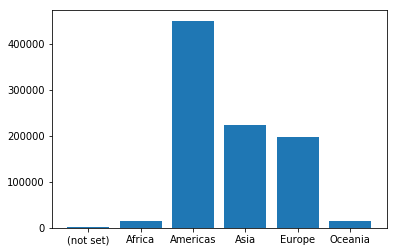

In [12]:
plt.bar(totalContinentVisited.index, totalContinentVisited)

#Using plotly, Total number of sub-Continent visited

data = [go.Bar(
            x=totalContinentVisited.index,
            y=totalContinentVisited
    )]

layout = go.Layout(
    title='Total visits by every continent',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total continent visited')


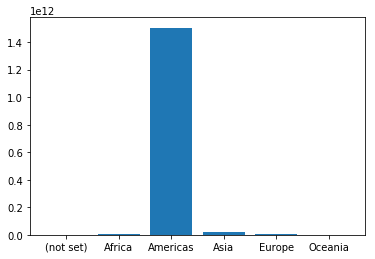

In [13]:
plt.bar(totalContinentPurchased.index, totalContinentPurchased)

data = [go.Bar(
            x=totalContinentPurchased.index,
            y=totalContinentPurchased
    )]

layout = go.Layout(
    title='Total purchased by every continent',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total continent purchased')

**Visualization of different parameters on the basis of sub-continent**

<BarContainer object of 6 artists>

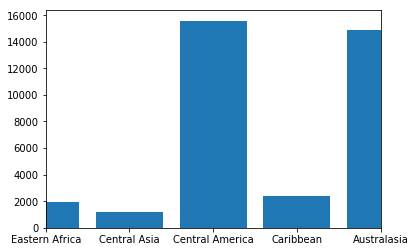

In [14]:
plt.xlim(5)
plt.bar(totalsubContinentVisited.index[:6], totalsubContinentVisited[:6])

In [15]:
#Using plotly, Total number of sub-Continent visited

data = [go.Bar(
            x=totalsubContinentVisited.index,
            y=totalsubContinentVisited
    )]

layout = go.Layout(
    title='Total visits by every sub-continent',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total sub-Continent visited')


In [16]:
#Using plotly, Total number of sub-Continent purchased

data = [go.Bar(
            x=totalsubContinentPurchased.index,
            y=totalsubContinentPurchased
    )]

layout = go.Layout(
    title='Total purchased by every sub-continent',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total sub-Continent purchased')

<BarContainer object of 6 artists>

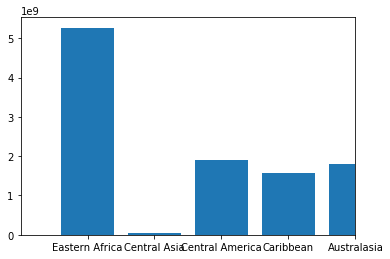

In [17]:
plt.xlim(6)
plt.bar(totalsubContinentPurchased.index[:6], totalsubContinentPurchased[:6])

**On the basis of Browser**

In [18]:
totalVisitsBrowser = train_data.groupby('device.browser')['totals.visits'].sum()
print("Total number of browsers used by users : ",totalVisitsBrowser.size)

totalPurchasedBrowser = train_data.groupby('device.browser')['totals.transactionRevenue'].sum()
print("Total number of browsers through users purchased : ",totalPurchasedBrowser.size)

Total number of browsers used by users :  54
Total number of browsers through users purchased :  54


In [19]:
data = [go.Bar(
            x=totalVisitsBrowser.index,
            y=totalVisitsBrowser
    )]

layout = go.Layout(
    title='Total visited by every browser',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total Browsers visited')

data = [go.Bar(
            x=totalPurchasedBrowser.index,
            y=totalPurchasedBrowser
    )]

layout = go.Layout(
    title='Total purchased by every browser',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total Browsers purchased')


In [20]:
totalDeviceUsed = train_data.groupby('device.deviceCategory')['totals.visits'].sum()
print("Category of devices used by users : ",totalDeviceUsed.size)

data = [go.Bar(
            x=totalDeviceUsed.index,
            y=totalDeviceUsed
    )]

layout = go.Layout(
    title='Total devices all users used',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total devices visited')


totalDevicePurchased = train_data.groupby('device.deviceCategory')['totals.transactionRevenue'].sum()
print("Category of devices used by users : ",totalDevicePurchased.size)

data = [go.Bar(
            x=totalDevicePurchased.index,
            y=totalDevicePurchased
    )]

layout = go.Layout(
    title='Total devices all users purchased from',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total devices purchased')


Category of devices used by users :  3


Category of devices used by users :  3


In [21]:
totalOSUsed = train_data.groupby('device.operatingSystem')['totals.visits'].sum()
print("Category of Operating Systems used by users : ",totalOSUsed.size)

data = [go.Bar(
            x=totalOSUsed.index,
            y=totalOSUsed
    )]

layout = go.Layout(
    title='Total OS used by users',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total OS used for visited')


totalOSPurchased = train_data.groupby('device.operatingSystem')['totals.transactionRevenue'].sum()
print("Category of OS purchased by users : ",totalOSPurchased.size)

data = [go.Bar(
            x=totalOSPurchased.index,
            y=totalOSPurchased
    )]

layout = go.Layout(
    title='Total OS used by purchased users',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total OS purchased')


Category of Operating Systems used by users :  20


Category of OS purchased by users :  20


In [22]:
totalCityVisited = train_data.groupby('geoNetwork.city')['totals.visits'].sum()
print("Total number of cities visited by users : ",totalCityVisited.size)

data = [go.Bar(
            x=totalCityVisited.index,
            y=totalCityVisited
    )]

layout = go.Layout(
    title='Total cities visited by users',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total number of visited users')


totalCityPurchased = train_data.groupby('geoNetwork.city')['totals.transactionRevenue'].sum()
print("Total number of cities purchased by users : ",totalCityPurchased.size)

data = [go.Bar(
            x=totalCityPurchased.index,
            y=totalCityPurchased
    )]

layout = go.Layout(
    title='Total cities by purchased users',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total cities purchased')


Total number of cities visited by users :  649


Total number of cities purchased by users :  649


In [23]:

totalRegionVisited = train_data.groupby('geoNetwork.region')['totals.visits'].sum()
print("Total number of regions visited by users : ",totalRegionVisited.size)

data = [go.Bar(
            x=totalRegionVisited.index,
            y=totalRegionVisited
    )]

layout = go.Layout(
    title='Total regions visited by users',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total number of visited users')


totalRegionPurchased = train_data.groupby('geoNetwork.region')['totals.transactionRevenue'].sum()
print("Total number of regions purchased by users : ",totalRegionPurchased.size)

data = [go.Bar(
            x=totalRegionPurchased.index,
            y=totalRegionPurchased
    )]

layout = go.Layout(
    title='Total regions by purchased users',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total regions purchased')


Total number of regions visited by users :  376


Total number of regions purchased by users :  376


In [24]:
totalHitsVisited = train_data.groupby('totals.hits')['totals.visits'].sum()
print("Total number of hits by visiters : ",totalHitsVisited.size)

data = [go.Bar(
            x=totalHitsVisited.index,
            y=totalHitsVisited
    )]

layout = go.Layout(
    title='Total hits by visiters',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total number of hits by visiters')


totalHitsPurchased = train_data.groupby('totals.hits')['totals.transactionRevenue'].sum()
print("Maximum number of hits by purchasers : ",totalHitsPurchased.max())

data = [go.Bar(
            x=totalHitsPurchased.index,
            y=totalHitsPurchased
    )]

layout = go.Layout(
    title='Total hits by purchasers',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total hits purchased')


Total number of hits by visiters :  274


Maximum number of hits by purchasers :  39547520000.0


In [25]:
totalPagesVisited = train_data['totals.pageviews'].value_counts()
print("Total number of Pages visited by visiters : ",totalPagesVisited.size)

data = [go.Bar(
            x=totalPagesVisited.index,
            y=totalPagesVisited
    )]

layout = go.Layout(
    title='Total page Views by visiters',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total number of page views by visiters')


totalHitsPurchased = train_data.groupby('totals.pageviews')['totals.transactionRevenue'].sum()
print("Maximum number of page visited by purchasers : ",totalHitsPurchased.max())

data = [go.Bar(
            x=totalHitsPurchased.index,
            y=totalHitsPurchased
    )]

layout = go.Layout(
    title='Total page views by purchasers',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total page views purchased')


Total number of Pages visited by visiters :  213


Maximum number of page visited by purchasers :  50568120000.0


In [26]:

totalChannel = train_data.groupby('channelGrouping')['totals.visits'].sum()
print("Total number of channels grouping : ",totalChannel.size)

data = [go.Bar(
            x=totalChannel.index,
            y=totalChannel
    )]

layout = go.Layout(
    title='Total channel grouping',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total channel grouping')



totalChannelPurchased = train_data.groupby('channelGrouping')['totals.transactionRevenue'].sum()
print("Total number of channels grouping purchased : ",totalChannelPurchased.size)

data = [go.Bar(
            x=totalChannelPurchased.index,
            y=totalChannelPurchased
    )]

layout = go.Layout(
    title='Total channel grouping purchased',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total channel grouping purchased')


Total number of channels grouping :  8


Total number of channels grouping purchased :  8


**Missing values**

In [27]:
#Checking how many columns are missing in all feature set

miss_per = {}
for k, v in dict(train_data.isna().sum(axis=0)).items():
    if v == 0:
        continue
    miss_per[k] = 100 * float(v) / len(train_data)
    
    
import operator 
sorted_x = sorted(miss_per.items(), key=operator.itemgetter(1), reverse=True)
print ("There are " + str(len(miss_per)) + " columns with missing values")

kys = [_[0] for _ in sorted_x]
vls = [_[1] for _ in sorted_x]

trace1 = go.Bar(y = kys[::-1], orientation="h" , x = vls[::-1], marker=dict(color="#d6a5ff"))
layout = go.Layout(title="Missing Values Percentage", 
                   xaxis=dict(title="Missing Percentage"), 
                   height=400, margin=dict(l=300, r=300))
figure = go.Figure(data = [trace1], layout = layout)
iplot(figure)

There are 14 columns with missing values


In [28]:
visitNumber = train_data['visitNumber'].value_counts()

data = [go.Bar(
            x=visitNumber.index,
            y=visitNumber
    )]

layout = go.Layout(
    title='Total channel grouping purchased',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Total channel grouping purchased')

In [29]:

def vn_bins(x):
    if x == 1:
        return "1" 
    elif x < 5:
        return "2-5"
    elif x < 10:
        return "5-10"
    elif x < 50:
        return "10-50"
    elif x < 100:
        return "50-100"
    else:
        return "100+"
    
vn = train_data["visitNumber"].apply(vn_bins).value_counts()

data = go.Bar(y = vn.index[::-1], orientation="h" , x = vn.values[::-1], marker=dict(color="#7af9ad"))
layout = go.Layout(title="Visit Numbers Distribution", 
                   xaxis=dict(title="Frequency"),yaxis=dict(title="VisitNumber") ,
                   height=400, margin=dict(l=300, r=300))
figure = go.Figure(data = [data], layout = layout)
iplot(figure)

vnPurchase = train_data.groupby('visitNumber')['totals.transactionRevenue'].sum()

dataP = go.Bar(y = vnPurchase.values, orientation="v" , x = vnPurchase.index, marker=dict(color="#7af9ad"))

layoutP = go.Layout(title="Visit Numbers Purchases Distribution", 
                   xaxis=dict(title="Purchase Revenue"),yaxis=dict(title="VisitNumber") ,
                   height=400, margin=dict(l=300, r=300))

figure = go.Figure(data = [dataP], layout = layoutP)
iplot(figure)

In [30]:
TotalNewVisitsPurchase = train_data.groupby('totals.newVisits')['totals.transactionRevenue'].sum()
print("Total number of purchases on first visit : ",TotalNewVisitsPurchase)

#train_data.groupby('totals.newVisits')['geoNetwork.country'].sum()

Total number of purchases on first visit :  totals.newVisits
1.0    3.823260e+11
Name: totals.transactionRevenue, dtype: float64


In [31]:
adContent = train_data['trafficSource.adContent']
adContent = adContent.dropna()
data = go.Bar(x=adContent, y=adContent.index)
layout = go.Layout(title="Traffic source ad content without null values")
figure = go.Figure(data = [data], layout=layout)
iplot(figure)

In [32]:
AdNetworkType = train_data['trafficSource.adwordsClickInfo.adNetworkType']
AdNetworkType = AdNetworkType.dropna()
print("Size of Ad network type : ", AdNetworkType.size)

Size of Ad network type :  21460


In [33]:
gclID = train_data['trafficSource.adwordsClickInfo.gclId']
gclID.dropna()

102       Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRBVDYwnFaw...
271       Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRAq0D2zir1...
295       Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRMbhgNCALe...
305       Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRBRI7rtb79...
400       Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRDKcQOTkfR...
434       Cj0KEQjwo5--BRCS8ceLjv-XppUBEiQAGp15EMNOO9ncAa...
463       Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRN5NYAKlTA...
491       Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRLpO3WGRAW...
492       Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXROwIDheo-L...
499                              CN_98OOH8c4CFQyUaQodhOYGCw
552       Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRMSen0LMh8...
574       Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRLIyC4WoAA...
661                              CMS8ncaP8s4CFQyRaQod9owAvg
703       Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRAkEEyVuru...
706                              CJzf-JWi8c4CFUxbhgodC_gJgQ
707                              CLOv5JD78M4CFUuSfgodJ14IEg
728       Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEi

In [34]:
cliclInfoPage = train_data['trafficSource.adwordsClickInfo.page']
cliclInfoPage = cliclInfoPage.dropna()
data = go.Bar(x=cliclInfoPage, y=cliclInfoPage.index)
layout = go.Layout(title="Traffic source ad click Information of page without null values")
figure = go.Figure(data = [data], layout=layout)
iplot(figure)

In [35]:
slot = train_data['trafficSource.adwordsClickInfo.slot']
slot = slot.dropna()
data = go.Bar(x=slot, y=slot.index)
layout = go.Layout(title="Traffic source ad click Information of page without null values")
figure = go.Figure(data = [data], layout=layout)
iplot(figure)


In [36]:
trafficCampaing = train_data[train_data['trafficSource.campaign'] != "(not set)"]
trafficCamaing = trafficCampaing['trafficSource.campaign'].value_counts()
data = go.Bar(x=trafficCamaing.index, y=trafficCamaing)
layout = go.Layout(title="Traffic Campaign without not set value")
figure = go.Figure(data = [data], layout=layout)
iplot(figure)

In [37]:
trafficSourceKeywords = train_data['trafficSource.keyword']

trafficSourceKeywords = train_data[train_data['trafficSource.keyword'] != "(not provided)"]
trafficSourceKeywords = trafficSourceKeywords['trafficSource.keyword'].dropna()
trafficSourceKeywords = trafficSourceKeywords.value_counts()
data = go.Bar(x=trafficSourceKeywords.index, y=trafficSourceKeywords)
layout = go.Layout(title="Traffic Source keywords without not provided")
figure = go.Figure(data = [data], layout=layout)
iplot(figure)

In [38]:
trafficSourceKeywords = train_data['trafficSource.medium'].value_counts()
data = go.Bar(x=trafficSourceKeywords.index, y=trafficSourceKeywords)
layout = go.Layout(title="Traffic Source medium")
figure = go.Figure(data = [data], layout=layout)
iplot(figure)

In [39]:
train_data['trafficSource.referralPath']

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
5                                                       NaN
6                                                       NaN
7                                                       NaN
8                                                       NaN
9                                                       NaN
10                                                      NaN
11                                                      NaN
12                                                      NaN
13                                                      NaN
14                                                      NaN
15                                                      NaN
16                                      

In [40]:
trafficSource = train_data['trafficSource.source'].value_counts()
data = go.Bar(x=trafficSource.index, y=trafficSource)
layout = go.Layout(title="Traffic Source")
figure = go.Figure(data = [data], layout=layout)
iplot(figure)

In [41]:
#All Attributes
print(train_data.columns.values)

['Unnamed: 0' 'channelGrouping' 'date' 'fullVisitorId' 'sessionId'
 'socialEngagementType' 'visitId' 'visitNumber' 'visitStartTime'
 'device.browser' 'device.browserSize' 'device.browserVersion'
 'device.deviceCategory' 'device.flashVersion' 'device.isMobile'
 'device.language' 'device.mobileDeviceBranding' 'device.mobileDeviceInfo'
 'device.mobileDeviceMarketingName' 'device.mobileDeviceModel'
 'device.mobileInputSelector' 'device.operatingSystem'
 'device.operatingSystemVersion' 'device.screenColors'
 'device.screenResolution' 'geoNetwork.city' 'geoNetwork.cityId'
 'geoNetwork.continent' 'geoNetwork.country' 'geoNetwork.latitude'
 'geoNetwork.longitude' 'geoNetwork.metro' 'geoNetwork.networkDomain'
 'geoNetwork.networkLocation' 'geoNetwork.region'
 'geoNetwork.subContinent' 'totals.bounces' 'totals.hits'
 'totals.newVisits' 'totals.pageviews' 'totals.transactionRevenue'
 'totals.visits' 'trafficSource.adContent'
 'trafficSource.adwordsClickInfo.adNetworkType'
 'trafficSource.adwordsC

In [8]:
relevantAttributes = ['visitNumber', 'geoNetwork.country', 'totals.transactionRevenue']
print (relevantAttributes)

['visitNumber', 'geoNetwork.country', 'totals.transactionRevenue']


In [9]:
trainData_NB = train_data.sample(frac=0.8,random_state=200)
testData_NB = train_data.drop(trainData_NB.index)

trainData_NB = trainData_NB[relevantAttributes]
testData_NB = testData_NB[relevantAttributes]

trainData_NB['totals.transactionRevenue'] = trainData_NB['totals.transactionRevenue'].fillna(0)
testData_NB['totals.transactionRevenue'] = testData_NB['totals.transactionRevenue'].fillna(0)

print ('Train Data Shape : ', trainData_NB.shape)
print ('Test Data Shape : ', testData_NB.shape)

Train Data Shape :  (722922, 3)
Test Data Shape :  (180731, 3)


In [104]:
nonZeroTransactions = trainData_NB[trainData_NB['totals.transactionRevenue'] != 0]
nonZeroTransactions = nonZeroTransactions.reset_index()
prob_Revenue = len(nonZeroTransactions)/len(trainData_NB)

print(prob_Revenue)


0.012746880023017697


In [105]:
dataItem = trainData_NB.head(1)
print(dataItem)

nonZeroTransactions['visitNumber'][0]

        visitNumber geoNetwork.country  totals.transactionRevenue
548725            1      United States                        0.0


1

In [106]:
count_vn = 0
count_c = 0
for i in range(len(nonZeroTransactions)):
    #print(nonZeroTransactions['visitNumber'][i], dataItem['visitNumber'].any())
    if (nonZeroTransactions['visitNumber'][i] == dataItem['visitNumber'].any()):
        #print(nonZeroTransactions['visitNumber'][i])
        count_vn = count_vn + 1
    #print(nonZeroTransactions['geoNetwork.country'][i] == dataItem['geoNetwork.country'].any())
    if (nonZeroTransactions['geoNetwork.country'][i] == dataItem['geoNetwork.country'].any()):
        count_c = count_c + 1

print(count_vn, count_c)
prob_visitNumber_givenRev = count_vn/len(nonZeroTransactions)
prob_country_givenRev = count_c/len(nonZeroTransactions)
print(prob_visitNumber_givenRev)
print(prob_country_givenRev)

3551 8764
0.38534997287032013
0.9510580575149213


In [107]:
zeroTransactions = trainData_NB[trainData_NB['totals.transactionRevenue'] == 0]

zeroTransactions = zeroTransactions.reset_index()
for i in range(len(zeroTransactions)):
    #print(nonZeroTransactions['visitNumber'][i], dataItem['visitNumber'].any())
    if (zeroTransactions['visitNumber'][i] == dataItem['visitNumber'].any()):
        #print(nonZeroTransactions['visitNumber'][i])
        count_vn = count_vn + 1
    #print(nonZeroTransactions['geoNetwork.country'][i] == dataItem['geoNetwork.country'].any())
    if (zeroTransactions['geoNetwork.country'][i] == dataItem['geoNetwork.country'].any()):
        count_c = count_c + 1

print(count_vn, count_c)

prob_visitNumber = count_vn/(len(nonZeroTransactions) + len(zeroTransactions))
prob_country = count_c/(len(nonZeroTransactions) + len(zeroTransactions))
print(prob_visitNumber)
print(prob_country)


562316 291889
0.7778377196986673
0.4037627849200882


In [109]:
probRevenue = prob_country_givenRev * prob_visitNumber_givenRev * prob_Revenue / (prob_country * prob_visitNumber)
print(probRevenue)

0.014874794461313822


In [ ]:
errorCount = 0
correctLabels = 0

for index in range(len(testData_NB)):
    item = testData_NB.iloc[index,:]
    
#     print (item)
    
    count_vn = 0
    count_c = 0
    
    for i in range(len(nonZeroTransactions)):
        #print(nonZeroTransactions['visitNumber'][i], dataItem['visitNumber'].any())
        if (nonZeroTransactions['visitNumber'][i] == item['visitNumber']):
            #print(nonZeroTransactions['visitNumber'][i])
            count_vn = count_vn + 1
        #print(nonZeroTransactions['geoNetwork.country'][i] == dataItem['geoNetwork.country'].any())
        if (nonZeroTransactions['geoNetwork.country'][i] == item['geoNetwork.country']):
            count_c = count_c + 1

    prob_visitNumber_givenRev = count_vn/len(nonZeroTransactions)
    prob_country_givenRev = count_c/len(nonZeroTransactions)

    zeroTransactions = trainData_NB[trainData_NB['totals.transactionRevenue'] == 0]

    zeroTransactions = zeroTransactions.reset_index()
    for i in range(len(zeroTransactions)):
        #print(nonZeroTransactions['visitNumber'][i], dataItem['visitNumber'].any())
        if (zeroTransactions['visitNumber'][i] == item['visitNumber']):
            #print(nonZeroTransactions['visitNumber'][i])
            count_vn = count_vn + 1
        #print(nonZeroTransactions['geoNetwork.country'][i] == dataItem['geoNetwork.country'].any())
        if (zeroTransactions['geoNetwork.country'][i] == item['geoNetwork.country']):
            count_c = count_c + 1

    prob_visitNumber = count_vn/(len(nonZeroTransactions) + len(zeroTransactions))
    prob_country = count_c/(len(nonZeroTransactions) + len(zeroTransactions))
    
    probRevenue = prob_country_givenRev * prob_visitNumber_givenRev * prob_Revenue / (prob_country * prob_visitNumber)

    if (probRevenue > 0.5):
        if item['totals.transactionRevenue'] == 0:
            errorCount += 1
        else:
            correctLabels += 1
    else:
        if item['totals.transactionRevenue'] != 0:
            errorCount += 1
        else:
            correctLabels += 1
            
    print ('errors : ', errorCount, '           correct labels : ', correctLabels)
    
print('----------------------------------------------------------------------------')
print(errorCount/len(testData_NB))
print('----------------------------------------------------------------------------')

errors :  0            correct labels :  1
errors :  0            correct labels :  2
errors :  0            correct labels :  3
errors :  0            correct labels :  4
errors :  0            correct labels :  5
errors :  0            correct labels :  6
errors :  0            correct labels :  7
errors :  0            correct labels :  8
errors :  0            correct labels :  9
errors :  0            correct labels :  10
errors :  0            correct labels :  11
errors :  0            correct labels :  12
errors :  0            correct labels :  13
errors :  0            correct labels :  14
errors :  0            correct labels :  15
errors :  0            correct labels :  16
errors :  0            correct labels :  17
